# 📊 Caso: Control de Proceso en `Quality Associates, Inc.`  

Quality Associates, Inc., una firma consultora especializada en **estadística aplicada y control de calidad**, fue contratada por una empresa de manufactura que buscaba asegurar la estabilidad de su proceso de producción.  

En la primera fase de la asesoría, el cliente proporcionó una **muestra histórica de 800 observaciones** obtenidas cuando el proceso estaba operando en condiciones satisfactorias. El análisis de estos datos reveló que la **desviación estándar del proceso era de 0.21**. Dado el tamaño de la muestra, se consideró razonable tratar este valor como la **desviación estándar poblacional**.  

Con esta información, Quality Associates recomendó implementar un **plan de monitoreo periódico**: tomar **muestras aleatorias de tamaño 30** a intervalos regulares. El objetivo era que, a partir de estas muestras, la empresa pudiera determinar rápidamente si el proceso continuaba en control o si, por el contrario, debía intervenirse para corregir desviaciones.  

De acuerdo con las **especificaciones de producción**, la media del proceso debía mantenerse en **12 unidades**. Para evaluar esto, los consultores propusieron la siguiente prueba de hipótesis:  

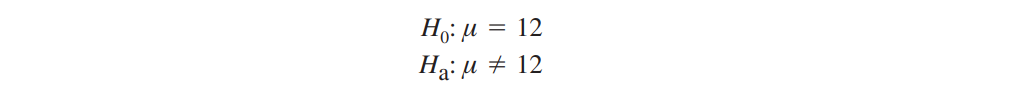

Bajo este esquema, **si se rechazaba $Ho$** en algún análisis, se debían tomar de inmediato medidas correctivas para investigar y eliminar la causa del problema.  

El nuevo procedimiento de control comenzó a aplicarse desde el primer día, tomando **muestras cada hora** durante la jornada laboral. Estos datos conforman el conjunto denominado **Quality**, el cual constituye la base para aplicar las pruebas estadísticas y verificar si el proceso se mantiene bajo control.  

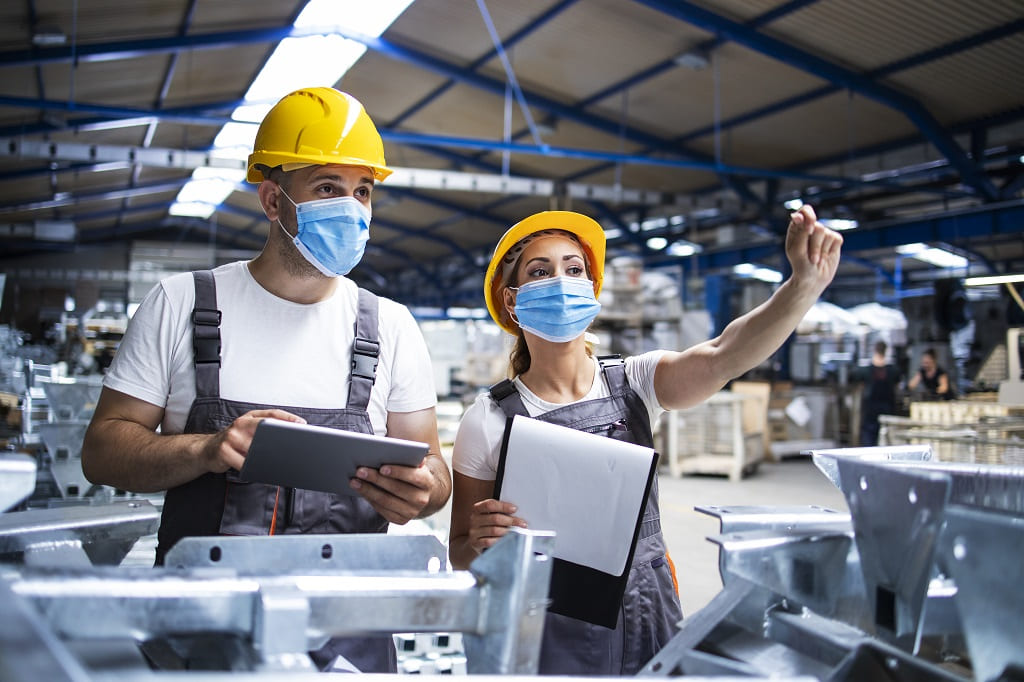


### 1. Evaluación de muestras mediante pruebas de hipótesis  
Para cada una de las muestras recolectadas durante el primer día de implementación, se deberá aplicar una **prueba de hipótesis bilateral** con un **nivel de significancia de 0.01**.  
El análisis debe incluir:  
- El **estadístico de prueba** calculado.  
- El **valor-p** asociado.  
- La **decisión final** respecto a la hipótesis nula.  
- Las **medidas correctivas** a aplicar en caso de rechazo de \(H_0\).


In [65]:
from io import StringIO
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [66]:
# Datos de ejemplo
# Estos datos representan las muestras de un proceso de producción
# Cada columna representa una muestra tomada en diferentes momentos
# Las filas representan las mediciones de cada muestra
data = StringIO(""" 
Muestra_1,Muestra_2,Muestra_3,Muestra_4
11.55,11.62,11.91,12.02
11.62,11.69,11.36,12.02
11.52,11.59,11.75,12.05
11.75,11.82,11.95,12.18
11.90,11.97,12.14,12.11
11.64,11.71,11.72,12.07
11.80,11.87,11.61,12.05
12.03,12.10,11.85,11.64
11.94,12.01,12.16,12.39
11.92,11.99,11.91,11.65
12.13,12.20,12.12,12.11
12.09,12.16,11.61,11.90
11.93,12.00,12.21,12.22
12.21,12.28,11.56,11.88
12.32,12.39,11.95,12.03
11.93,12.00,12.01,12.35
11.85,11.92,12.06,12.09
11.76,11.83,11.76,11.77
12.16,12.23,11.82,12.20
11.77,11.84,12.12,11.79
12.00,12.07,11.60,12.30
12.04,12.11,11.95,12.27
11.98,12.05,11.96,12.29
12.30,12.37,12.22,12.47
12.18,12.25,11.75,12.03
11.97,12.04,11.96,12.17
12.17,12.24,11.95,11.94
11.85,11.92,11.89,11.97
12.30,12.37,11.88,12.23
12.15,12.22,11.93,12.25
""")

# Cargar los datos en un DataFrame
data = pd.read_csv(data, sep=',')
data

,Muestra_1,Muestra_2,Muestra_3,Muestra_4
0,11.55,11.62,11.91,12.02
1,11.62,11.69,11.36,12.02
2,11.52,11.59,11.75,12.05
3,11.75,11.82,11.95,12.18
4,11.90,11.97,12.14,12.11
5,11.64,11.71,11.72,12.07
6,11.80,11.87,11.61,12.05
7,12.03,12.10,11.85,11.64
8,11.94,12.01,12.16,12.39
9,11.92,11.99,11.91,11.65


In [67]:
data.info() # Información sobre el DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Muestra_1  30 non-null     float64
 1   Muestra_2  30 non-null     float64
 2   Muestra_3  30 non-null     float64
 3   Muestra_4  30 non-null     float64
dtypes: float64(4)
memory usage: 1.1 KB


In [68]:
data.describe() # Estadísticas descriptivas de las muestras

,Muestra_1,Muestra_2,Muestra_3,Muestra_4
count,30.000000,30.000000,30.000000,30.000000
mean,11.958667,12.028667,11.889000,12.081333
std,0.220356,0.220356,0.207171,0.206109
min,11.520000,11.590000,11.360000,11.640000
25%,11.812500,11.882500,11.752500,11.982500
50%,11.955000,12.025000,11.920000,12.080000
75%,12.145000,12.215000,11.997500,12.227500
max,12.320000,12.390000,12.220000,12.470000


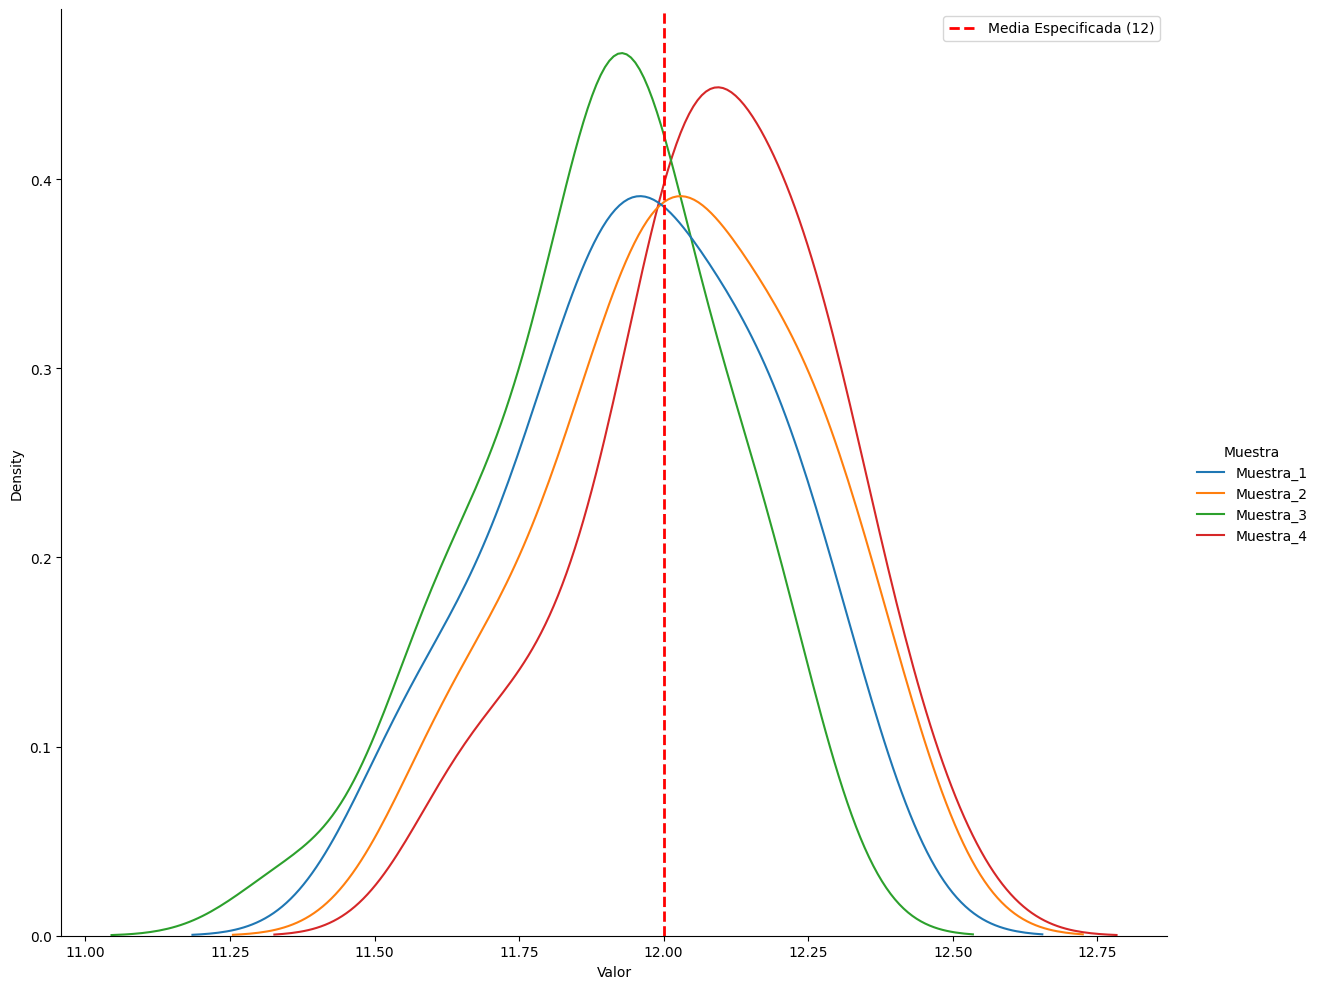

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

df_long = data.melt(var_name="Muestra", value_name="Valor")

# Graficamos solo las curvsas de densidad
sns.displot(
    data=df_long,
    x="Valor",
    hue="Muestra",
    kind="kde",
    fill=False,
    height=10,
    aspect=1.2
)

# Línea vertical en la media conocida (12)
plt.axvline(12, color="red", linestyle="--", linewidth=2, label="Media Especificada (12)")
plt.legend()
plt.show()


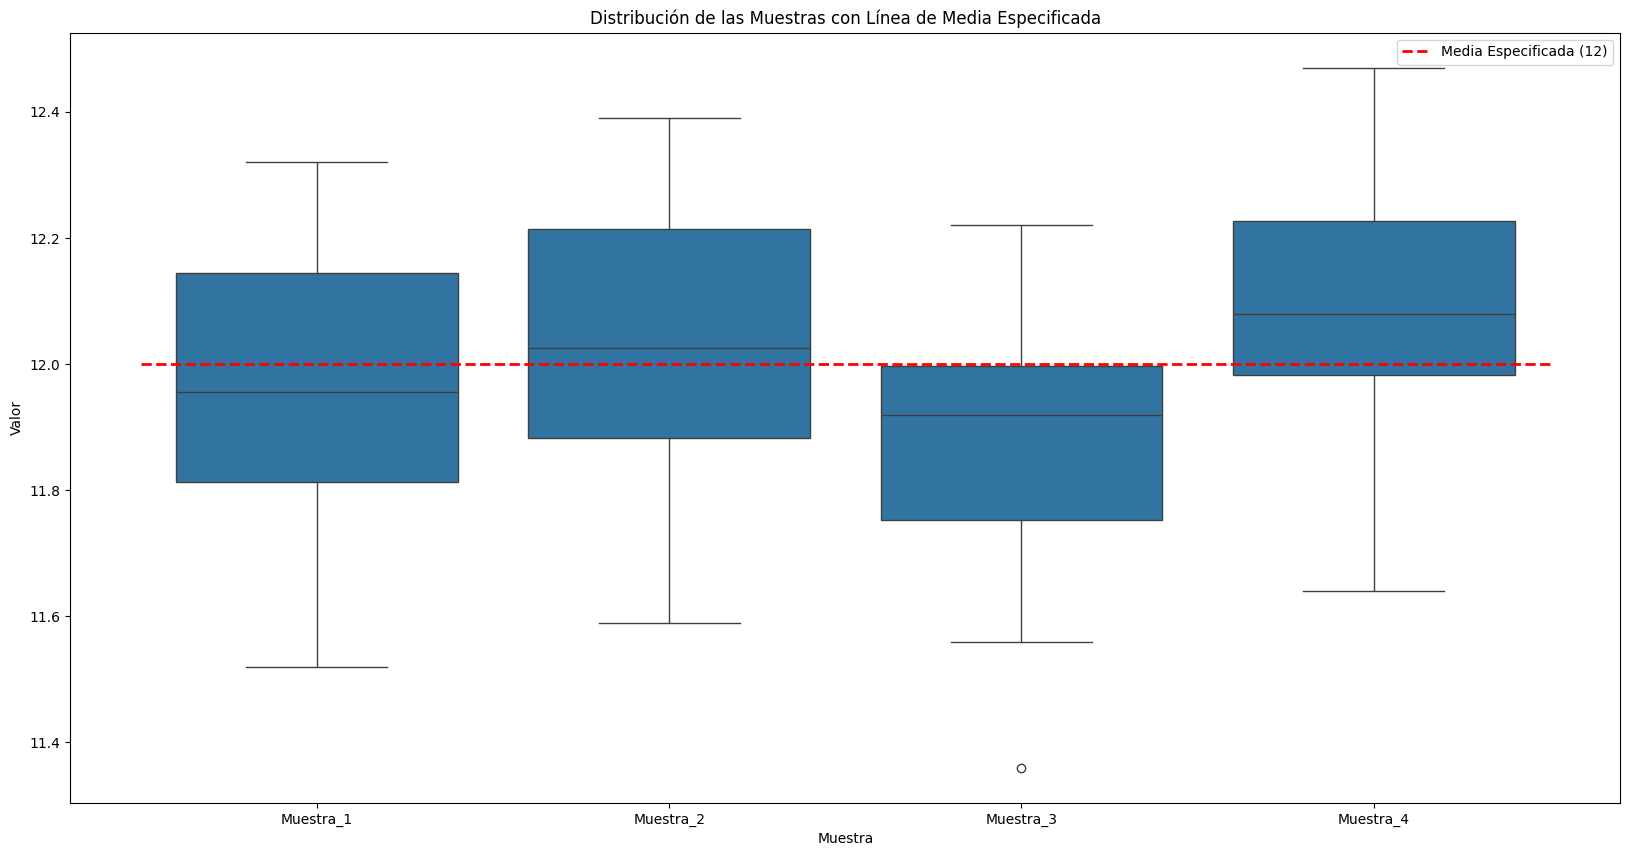

In [70]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_long, x="Muestra", y="Valor")
plt.hlines(y=12, xmin=-0.5, xmax=len(df_long["Muestra"].unique())-0.5, color="red", linestyle="--", linewidth=2, label="Media Especificada (12)")
plt.title("Distribución de las Muestras con Línea de Media Especificada")
plt.legend()
plt.show()

In [71]:
# Crear una función para probar la hipótesis

def prueba_muestra(muestra, sigma, mu0=12, alpha=0.01):
    n = len(muestra) # Definimos el tamaño de la muestra
    mean = np.mean(muestra) # Esta es la media muestral
    error_std = sigma / np.sqrt(n) # El error estándar

    # Estadístico de prueba
    z_score = (mean - mu0) / error_std # Cálculo del Z-score

    # Valor p (prueba bilateral) , donde en este caso es una prueba de hipótesis de toma de decisiones ya que se quiere tomar medidas correctivas si se rechaza H0
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    # Intervalo de confianza (95%)
    ci_inf = mean - 1.96 * error_std
    ci_sup = mean + 1.96 * error_std

    # Decisión
    decision = "Rechazar H0" if p_value < alpha else "No Rechazar H0"

    return {
        "Media Muestral": round(mean, 3),
        "Desv.Est.Muestral": round(np.std(muestra, ddof=1), 3),
        "Z-Score": round(z_score, 3),
        "p-value": round(p_value, 4),
        "Intervalo 95%": f"[{ci_inf:.2f}, {ci_sup:.2f}]",
        "Decisión": decision
    }


In [72]:
resultados = pd.DataFrame([
    prueba_muestra(data[col], 0.21, mu0=12, alpha=0.01) for col in data.columns
], index=data.columns)
resultados

,Media Muestral,Desv.Est.Muestral,Z-Score,p-value,Intervalo 95%,Decisión
Muestra_1,11.959,0.220,-1.078,0.2810,"[11.88, 12.03]",No Rechazar H0
Muestra_2,12.029,0.220,0.748,0.4547,"[11.95, 12.10]",No Rechazar H0
Muestra_3,11.889,0.207,-2.895,0.0038,"[11.81, 11.96]",Rechazar H0
Muestra_4,12.081,0.206,2.121,0.0339,"[12.01, 12.16]",No Rechazar H0


/var/data/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


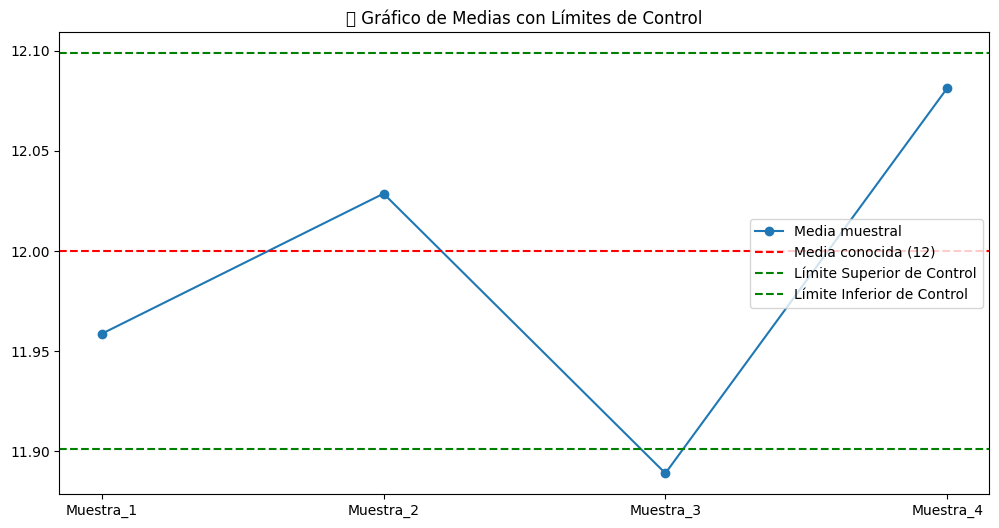

In [73]:
# Cálculo de límites de control para medias (con sigma poblacional)
n = 30
desviacion_poblacional_conocida = 0.21
media_conocida = 12
z_alpha = norm.ppf(1 - 0.005)  # para alfa=0.01 bilateral -> 0.005 en cada cola
error_std = desviacion_poblacional_conocida / np.sqrt(n)

UCL = media_conocida + z_alpha * error_std
LCL = media_conocida - z_alpha * error_std

# Calcular medias muestrales
medias = data.mean()

plt.figure(figsize=(12,6))
plt.plot(medias, marker='o', linestyle='-', label="Media muestral")
plt.axhline(mu0, color="red", linestyle="--", label="Media conocida (12)")
plt.axhline(UCL, color="green", linestyle="--", label="Límite Superior de Control")
plt.axhline(LCL, color="green", linestyle="--", label="Límite Inferior de Control")
plt.title("📊 Gráfico de Medias con Límites de Control")
plt.legend(loc="center right")
plt.show()


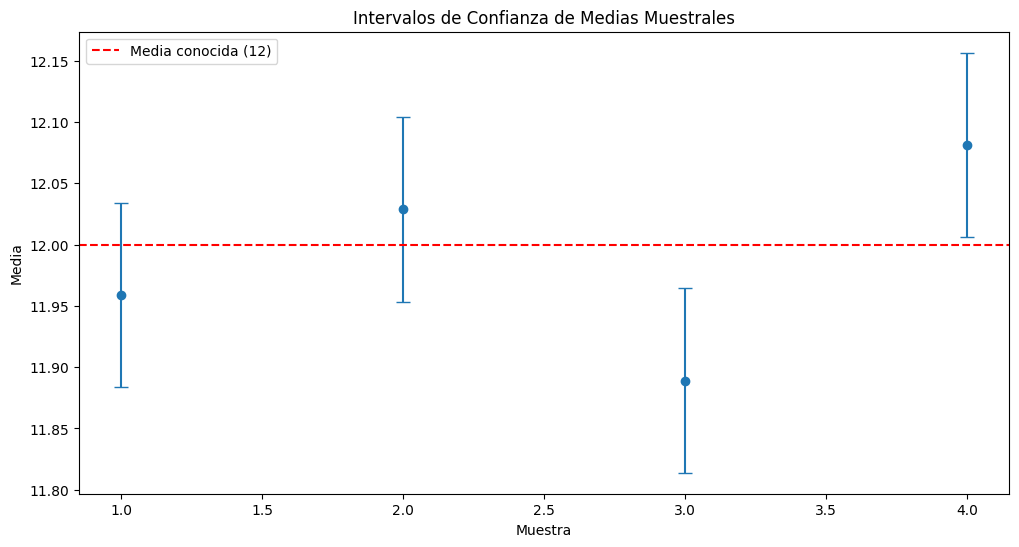

In [74]:
plt.figure(figsize=(12,6))
plt.errorbar(x=range(1, len(medias)+1),
             y=medias,
             yerr=1.96*error_std,
             fmt='o',
             capsize=5)
plt.axhline(mu0, color="red", linestyle="--", label="Media conocida (12)")
plt.title("Intervalos de Confianza de Medias Muestrales")
plt.xlabel("Muestra")
plt.ylabel("Media")
plt.legend()
plt.show()


### 2. Análisis de la variabilidad de las muestras  
Se calculará la **desviación estándar** de cada una de las cuatro muestras observadas.  
El objetivo es contrastar dichos valores con la desviación estándar poblacional **σ = 0.21**, a fin de determinar si resulta razonable mantener este valor como parámetro representativo de la variabilidad del proceso.

In [75]:
data.apply(lambda x: x.std())

Muestra_1    0.220356
Muestra_2    0.220356
Muestra_3    0.207171
Muestra_4    0.206109
dtype: float64

In [76]:
print(data.apply(lambda x: x.std(), axis = 0).to_frame().reset_index(drop=True).mean())
print("""
      Observamos que la desviación estándar de las muestras es de 0.213498, lo cual es consistente con la desviación estándar poblacional de 0.21.
      """)

0    0.213498
dtype: float64

      Observamos que la desviación estándar de las muestras es de 0.213498, lo cual es consistente con la desviación estándar poblacional de 0.21.
      
